<center><h1>Time Series Analysis</h1></center>
<center><h3>Resolución Laboratorio 2</h3></center>
<h5>Juan Tarletta</h5>
<br>

In [1]:
# Paquetes
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
# Plot settings
sns.set_context('notebook') 
sns.set_style('ticks')
red='#D62728'
blue='#1F77B4'
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 10]

#### Dataset demanda.cvs

In [3]:
data=pd.read_csv('datasets/demanda.csv', index_col='TIPO', parse_dates=True, dayfirst=True)

data.tail()

,Residencial,Comercial,Industrial/Comercial Grande,TOTAL
TIPO,,,,
2019-03-01,4004709.444,3044854.983,3072063.284,1.012163e+07
2019-04-01,3652724.519,2892482.731,3029687.889,9.574895e+06
2019-05-01,4356836.823,2973830.213,3055527.035,1.038619e+07
2019-06-01,4816838.191,2937048.667,2897618.673,1.065151e+07
2019-07-01,5704951.016,3288949.873,3035538.422,1.202944e+07


In [4]:
#Creamos una Serie Temporal a trabajar, que va a ser con los valores de la columna "TOTAL"
y = data['TOTAL'].copy()
y.index = y.index.to_period(freq='M') #Frecuencia Mensual

ts = data['TOTAL'] # Day indexed series

In [5]:
data.describe().round(2)

,Residencial,Comercial,Industrial/Comercial Grande,TOTAL
count,79.00,79.00,79.00,79.00
mean,4551935.29,3113096.42,3187977.02,10853008.74
std,654164.93,206829.98,124659.74,816874.81
min,3239380.70,2809183.13,2897618.67,9307334.16
25%,3990580.45,2948084.14,3109179.19,10223259.40
50%,4470715.12,3070853.24,3199317.20,10706955.32
75%,5092450.46,3270751.91,3275571.56,11476364.98
max,6193110.21,3606989.07,3460879.97,12607552.72


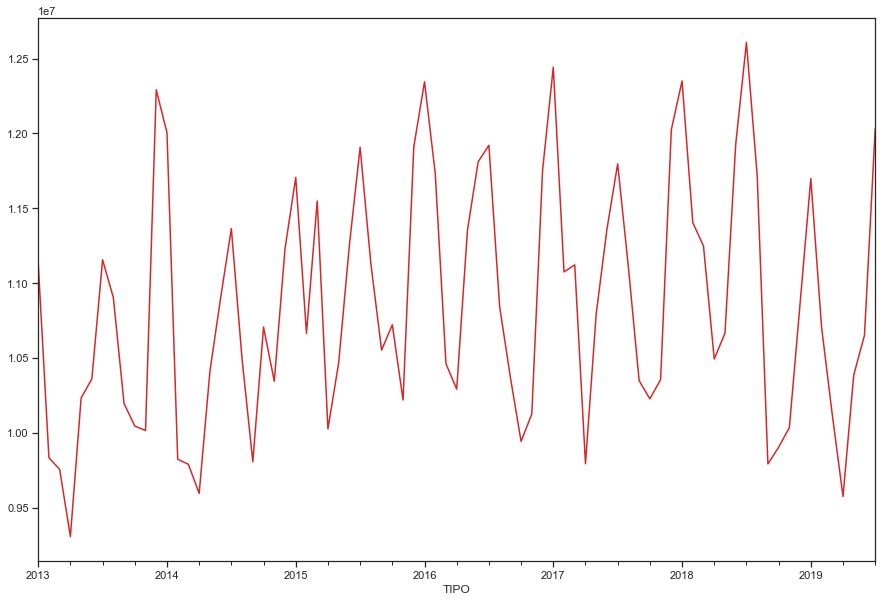

In [6]:
y.plot(color=red);#figsize=(9,6))

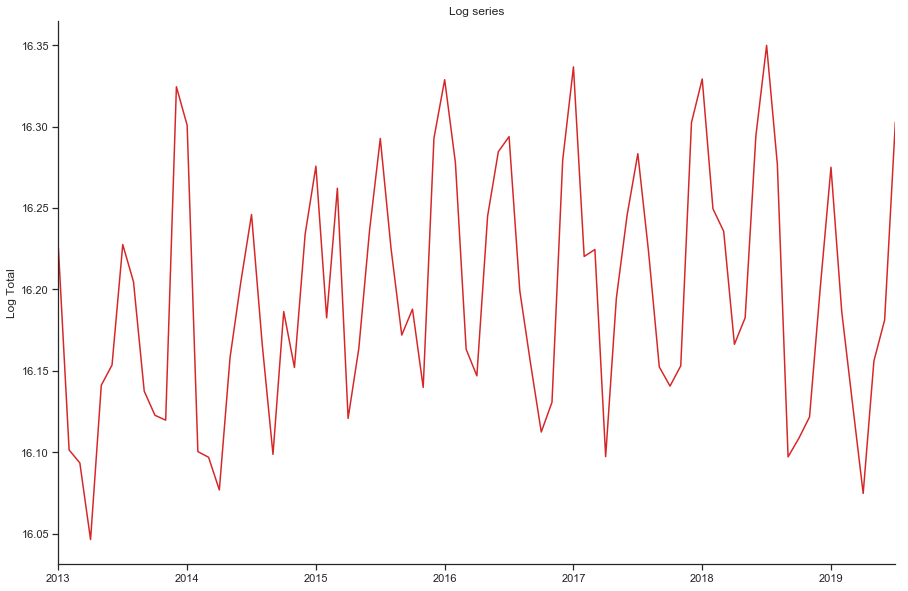

In [7]:
fig, ax= plt.subplots();#figsize=(9,6))
np.log(y).plot(color=red)
ax.set_xlabel('')
ax.set_ylabel('Log Total')
ax.set_title('Log series')
ax.set_xticks([], minor=True)
sns.despine()
plt.show()

##### A continuacion vamos a descomponer los datos con el método X-13 ARIMA-SEATS

In [8]:
#IMPORTANTISIMO!!! Luego de descargar la carpeta de win13 de ARIMA 
#Tenemos que ubicar el ejecutable x13as que descargamos para poder hacer la descomposición
import os

PATH =r'C:\Users\Juan\Documents\DIPLODATOS\1_Opta_Series_Temporales\AnalisisSeriesTemporales-master\WinX13\x13as'

os.chdir(PATH)

In [9]:
decomposition = sm.tsa.x13_arima_analysis(ts,x12path='.')

C:\Users\Juan\Anaconda3\envs\diplodatos\lib\site-packages\statsmodels\tsa\x13.py:187: X13Warning: WARNING: At least one visually significant trading day peak has been
          found in the estimated spectrum of the regARIMA residuals.
  
          found in one or more of the estimated spectra.
  warn(errors, X13Warning)


In [10]:
[attr for attr in dir(decomposition) if not attr.startswith('_')] #Verificamos las salidas

['irregular', 'observed', 'plot', 'results', 'seasadj', 'stdout', 'trend']

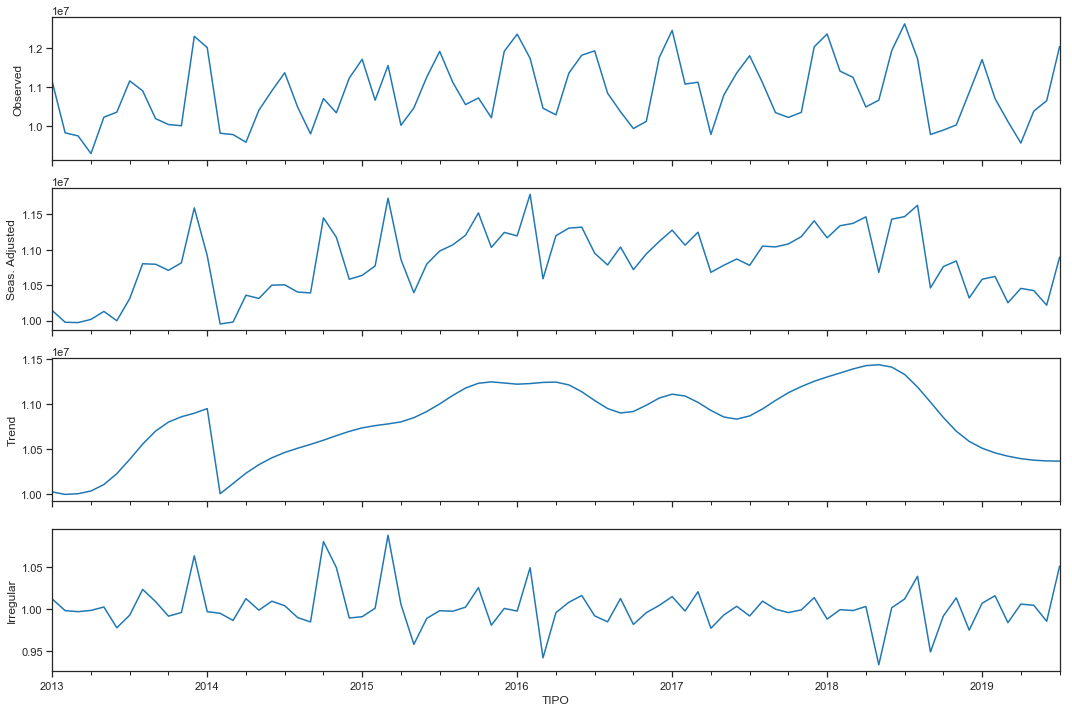

In [11]:
#Graficamos la descomposición
decomposition.plot()
plt.show()

In [12]:
#Ubicamos la direccion donde tenemos el archivo plotting.py para poder graficar
import os

PATH =r'C:\Users\Juan\Documents\DIPLODATOS\1_Opta_Series_Temporales\AnalisisSeriesTemporales-master'

os.chdir(PATH)


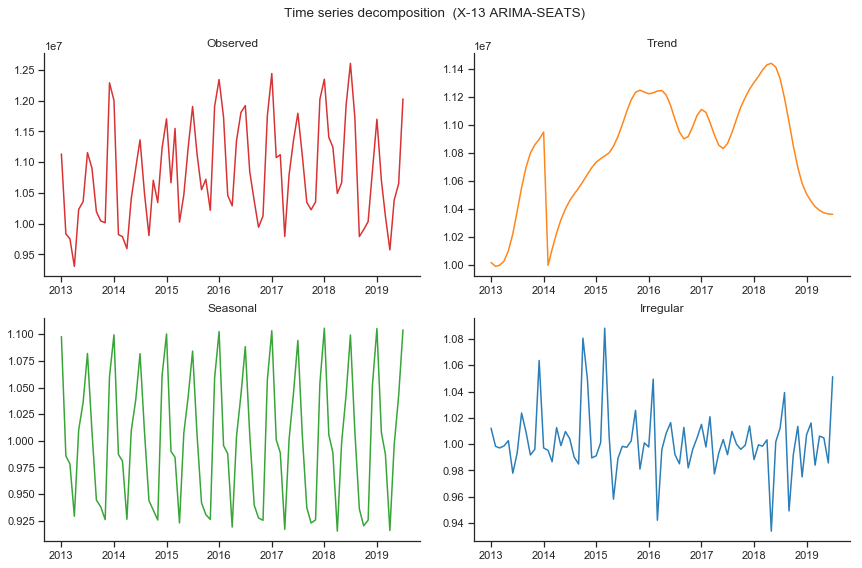

In [13]:
#Graficamos (de una forma mas "linda" a la anterior)
from plotting import plot_components_x13
plot_components_x13(decomposition)
plt.show()

#### Aclaración

*El software X-13-ARIMA genera un análisis muy detallado de la serie temporal, que se almacena en el atributo de resultados. Puede verlo con el comando print (decomposition.results), pero debido a la longitud, le recomiendo guardarlo en un archivo de texto y abrirlo en otro lugar. Puedes hacer esto de la siguiente manera.*

In [14]:
f=open('x13results.txt', mode='w+')
f.write(decomposition.results)
f.close()

En caso de que no pueda trabajar con el software de descomposición X13, hay una descomposición más básica disponible de la siguiente manera.

In [15]:
basic_decomposition = sm.tsa.seasonal_decompose(ts, model='multiplicative')

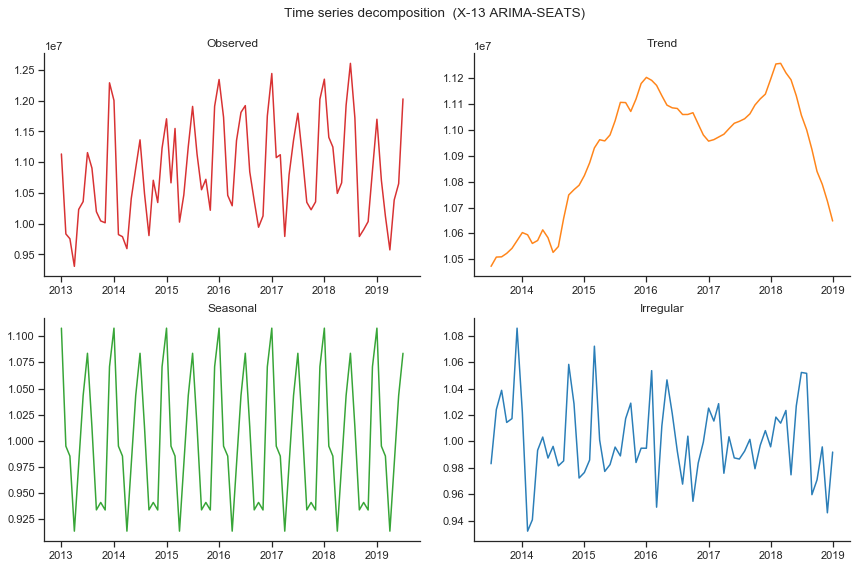

In [16]:
from plotting import plot_components_basic
plot_components_basic(basic_decomposition);

##### Holt-winters exponential smoothing

A continucación estimaremos varias especificaciones posibles. El AIC sugiere un modelo multiplicativo sin amortiguación para la serie original, pero necesitaríamos hacer un ajuste de likelihood o una comparación del conjunto de validación para seleccionar entre este método y un modelo aditivo para una transformación logarítmica.

In [17]:
def hw_summary(model_sm):
    rmse_sm = sm.tools.eval_measures.rmse(model_sm.data.endog,model_sm.fittedvalues)
    print(' In-sample fit:')
    print(' RMSE               {0:.3f}'.format(rmse_sm))
    return model_sm.summary()

In [18]:
ahw_sm=sm.tsa.ExponentialSmoothing(y, trend='add', damped=False, 
                                   seasonal='add', seasonal_periods=12).fit()

In [19]:
hw_summary(ahw_sm)

 In-sample fit:
 RMSE               471015.011


Dep. Variable:,endog,No. Observations:,79
Model:,ExponentialSmoothing,SSE,17526556124824.545
Optimized:,True,AIC,2095.898
Trend:,Additive,BIC,2133.809
Seasonal:,Additive,AICC,2107.298
Seasonal Periods:,12,Date:,"Mon, 23 Sep 2019"
Box-Cox:,False,Time:,09:23:37
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1668049,alpha,True
smoothing_slope,1.2698e-08,beta,True


In [20]:
mhw_sm=sm.tsa.ExponentialSmoothing(y, trend='add', damped=False, seasonal='mul', seasonal_periods=12).fit()
hw_summary(mhw_sm)

 In-sample fit:
 RMSE               373386.184


Dep. Variable:,endog,No. Observations:,79
Model:,ExponentialSmoothing,SSE,11013962158592.178
Optimized:,True,AIC,2059.198
Trend:,Additive,BIC,2097.109
Seasonal:,Multiplicative,AICC,2070.598
Seasonal Periods:,12,Date:,"Mon, 23 Sep 2019"
Box-Cox:,False,Time:,09:23:37
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3555770,alpha,True
smoothing_slope,5.6174e-14,beta,True


In [21]:
mhw_damped=sm.tsa.ExponentialSmoothing(y, trend='add', damped=True, seasonal='mul', seasonal_periods=12).fit()
hw_summary(mhw_damped)

 In-sample fit:
 RMSE               373992.563


Dep. Variable:,endog,No. Observations:,79
Model:,ExponentialSmoothing,SSE,11049764539993.861
Optimized:,True,AIC,2061.455
Trend:,Additive,BIC,2101.735
Seasonal:,Multiplicative,AICC,2074.336
Seasonal Periods:,12,Date:,"Mon, 23 Sep 2019"
Box-Cox:,False,Time:,09:23:39
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3601600,alpha,True
smoothing_slope,0.0526472,beta,True


Observamos cuan de cerca la serie suavizada basada en el método multiplicativo sigue a la serie original.

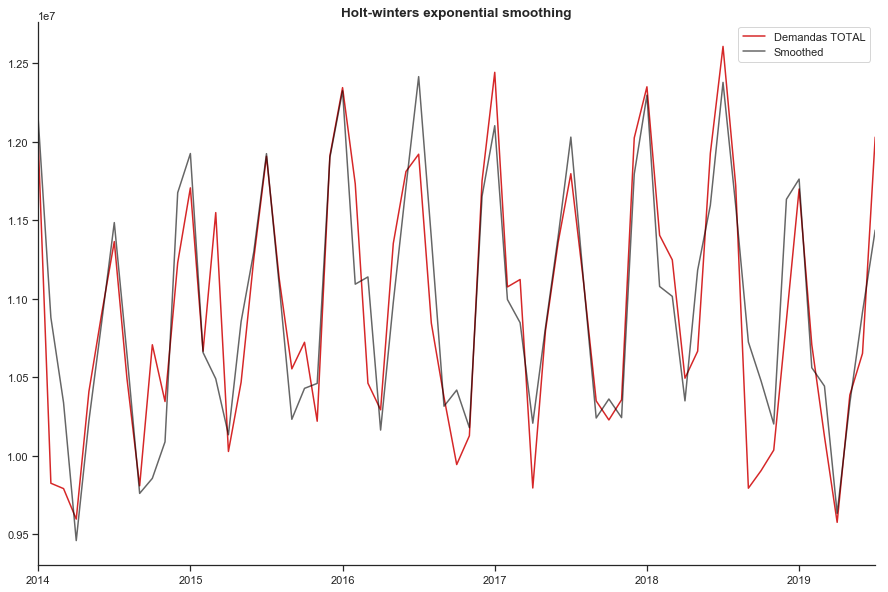

In [22]:
smoothed=pd.Series(mhw_sm.fittedvalues, index=y.index)

fig, ax= plt.subplots();#figsize=(9,6))

y['2014':].plot(color='#D62728', label='Demandas TOTAL')
smoothed['2014':].plot(color='black', label='Smoothed', alpha=0.6)
plt.legend(loc='best')
ax.set_xlabel('')
ax.set_xticks([], minor=True)
ax.set_title(r'Holt-winters exponential smoothing', fontsize=13.5, fontweight='bold')
sns.despine()
plt.show()

##### Diagnostico del Modelo y Análisis del residuo

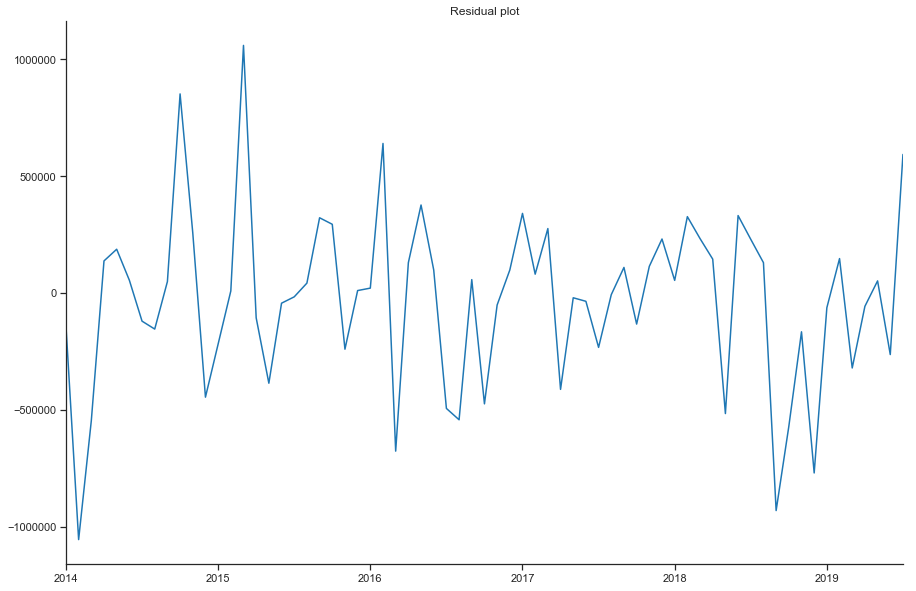

In [23]:
resid = (y-mhw_sm.fittedvalues)[12:] # we remove the first 12 observations as they are for initialisitation only

fig, ax= plt.subplots();#figsize=(9,6))
resid.plot(color=blue)
ax.set_xlabel('')
ax.set_xticks([], minor=True) 
ax.set_title('Residual plot')
sns.despine()
plt.show()

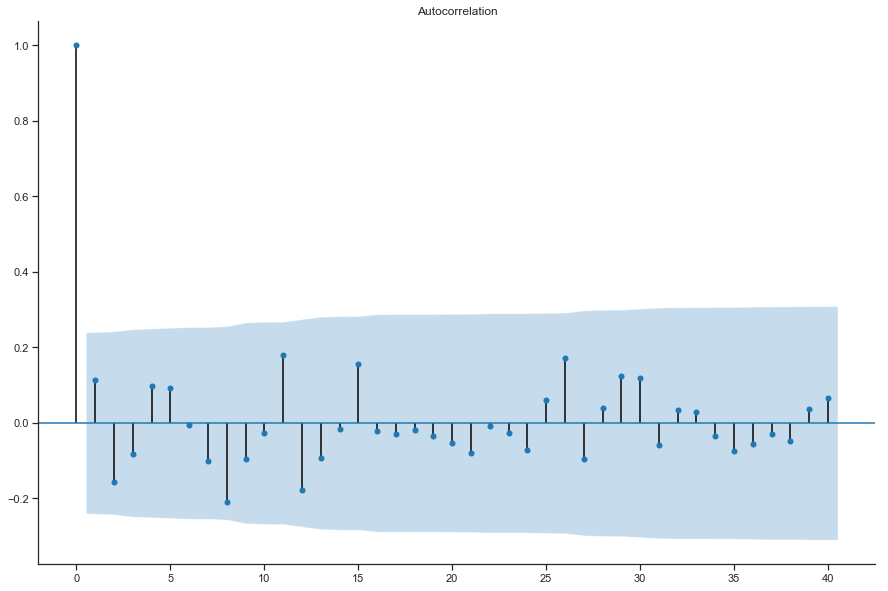

In [24]:
fig, ax = plt.subplots();#figsize=(9,6))
sm.graphics.tsa.plot_acf(resid, lags=40, ax=ax)
sns.despine()
plt.show()

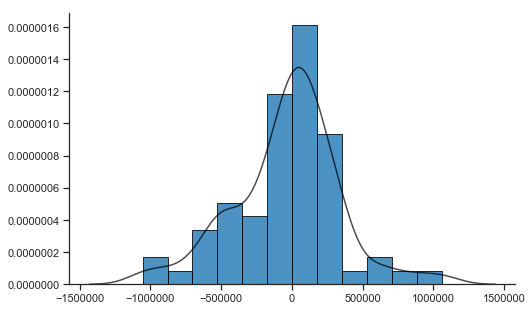

In [25]:
from plotting import histogram

histogram(resid)
plt.show()

##### Validación del modelo

In [26]:
start_val = y.index[-round(len(y)/12*.6)*12]
start_val

Period('2015-08', 'M')

###### Compararemos el modelo Seasonal Random Walk, Additive Holt winters, y Multiplicative Holt Winters con la serie original

C:\Users\Juan\Anaconda3\envs\diplodatos\lib\site-packages\statsmodels\tsa\holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\Users\Juan\Anaconda3\envs\diplodatos\lib\site-packages\statsmodels\tsa\holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


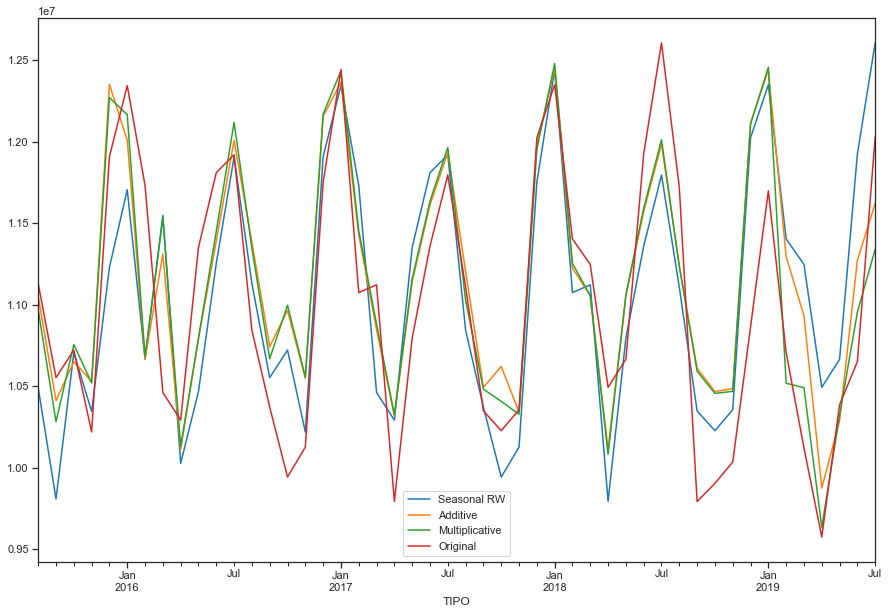

In [27]:
# Real time forecasting 

validation=y[start_val:].index
start = y.index.get_loc(start_val) 

pred1 = [] # seasonal random walk
pred2 = [] # additive holt winters
pred3 = [] # multiplicative holt winters
actual= []

for i in range(start, len(y)):
    
    actual.append(y.iloc[i]) # actual value
    
    pred1.append(y.iloc[i-12]) # seasonal random walk forecast
    
    model = sm.tsa.ExponentialSmoothing(y.iloc[:i], trend='add', damped=False, seasonal='add', seasonal_periods=12).fit()
    pred2.append(model.forecast(1)[0]) # additive holt winters forecast
    
    model = sm.tsa.ExponentialSmoothing(y.iloc[:i], trend='add', damped=False, seasonal='mul', seasonal_periods=12).fit()
    pred3.append(model.forecast(1)[0]) # multiplicate holt winters forecast
    

columns=['Seasonal RW', 'Additive', 'Multiplicative', 'Original']
results = np.vstack([pred1,pred2,pred3,actual]).T
results = pd.DataFrame(results, columns=columns, index=validation)
results.plot();

Observamos que *el modelo Multiplicativo es el que mejor se ajusta*, a continuacion lo corroboramos.

In [28]:
from scipy import stats

table = pd.DataFrame(0.0, index=results.columns[:-1], columns=['RMSE','SE'])
for i in range(len(results.columns)-1):
    table.iloc[i,0] = sm.tools.eval_measures.rmse(results.iloc[:,i], results.iloc[:,-1])
    table.iloc[i,1] = (results.iloc[:,i] - results.iloc[:,-1]).sem()
table.round(3)

,RMSE,SE
Seasonal RW,594064.638,86272.821
Additive,491442.602,68104.690
Multiplicative,474739.413,67211.993


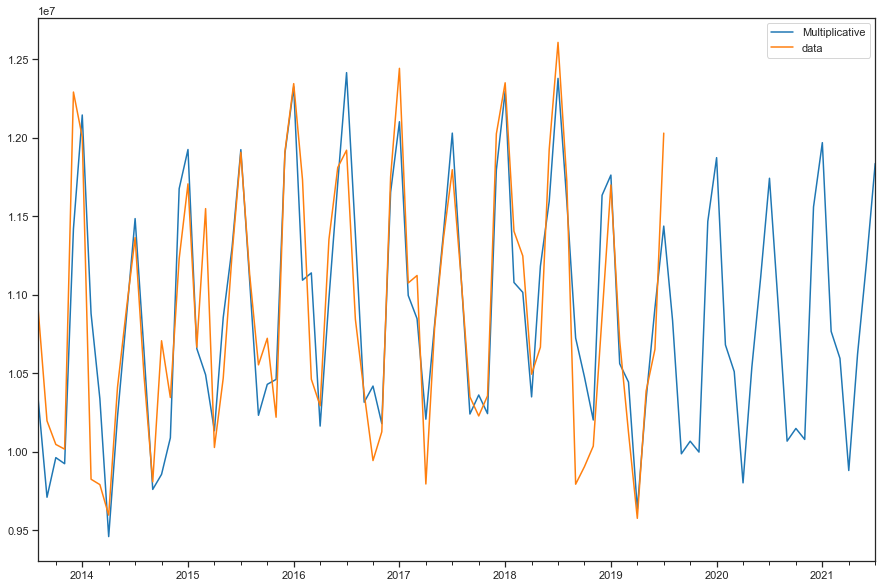

In [29]:
#Generamos una predicción de dos años basados en el modelo Multiplicativo
h=2*12 #M
w=h*3

model = sm.tsa.ExponentialSmoothing(y, 
                    trend='add', damped=False, seasonal='mul', seasonal_periods=12).fit()

plot = pd.DataFrame()
plot['Multiplicative'] = pd.concat([model.fittedvalues, model.forecast(h)])
plot['data'] = y

plot[-(w+h):].plot();#figsize=(9,6))